# Introduzione

## Nota Preliminare
In questo documento verranno presentati esclusivamente i risultati e le analisi relative alla parte di Natural Language Processing.
Il lavoro svolto sulla componente di Machine Learning è stato invece trattato nel progetto del corso di Fondamenti di Data Science e Machine Learning e, per evitare ridondanze, non verrà qui riportato. La relativa documentazione è comunque disponibile a parte.

## Descrizione del problema

La medicina sta diventando sempre più data-driven, con dati provenienti da cartelle cliniche elettroniche, imaging medico (radiografie, TAC, MRI), wearables e sensori remoti, e testi clinici non strutturati. Questi dati supportano diagnosi precoci, personalizzazione delle terapie, prevenzione e monitoraggio dei pazienti e ottimizzazione delle risorse sanitarie.

Il problema dell’anonimizzazione dei dati riguarda la trasformazione di dataset contenenti informazioni personali o sensibili in una forma che impedisca di risalire all’identità degli individui, pur mantenendo il più possibile l’utilità dei dati per analisi statistiche o applicazioni di machine learning.

La sfida principale sta nel bilanciare due esigenze spesso in conflitto:

Protezione della privacy → evitare che dati come nome, indirizzo, codice fiscale o informazioni sanitarie possano essere ricondotti a una persona specifica.
Utilità dei dati → preservare abbastanza dettaglio e struttura da permettere analisi accurate, senza distorsioni eccessive.
Anche dopo l’anonimizzazione, esiste il rischio di re-identificazione incrociando i dati con altre fonti. Per questo vengono usate tecniche come pseudonimizzazione, generalizzazione, randomizzazione.

L’obiettivo di questo progetto è analizzare e confrontare diverse tecniche di anonimizzazione dei dati sensibili e valutarne l’impatto sulle performance dei modelli predittivi.

## Research Question
Nel contesto del Natural Language Processing, questo progetto si propone di rispondere a 2 domande di ricerca principali:

1. Quanto sono efficaci le regular expression nell’anonimizzare auto-maticamente
le note cliniche generate?

2. Quanto è efficace il Named Entity Recognition (NER) nell’anonimizzare auto-
maticamente le note cliniche generate?

#Analisi Esplorativa del Dataset

Il **dataset Healtcare Dataset** è stato creato per essere una risorsa utile per gli appassionati di data science, machine learning e analisi dei dati. È progettato per imitare i dati sanitari del mondo reale, consentendo agli utenti di praticare, sviluppare e mostrare le loro abilità di manipolazione e analisi dei dati nel contesto del settore sanitario.

Ogni colonna fornisce informazioni specifiche sul paziente, sul suo ricovero e sui servizi sanitari ricevuti, rendendo questo dataset adatto a diversi compiti di analisi dei dati e modellazione nel settore sanitario. Ecco una breve spiegazione di ciascuna colonna del dataset:

* **Name**: rappresenta il nome del paziente associato al record sanitario.
* **Age**: l’età del paziente al momento del ricovero, espressa in anni.
* **Gender**: indica il genere del paziente, “Maschio” o “Femmina”.
* **Blood Type**: il gruppo sanguigno del paziente, che può essere uno dei gruppi comuni (es. “A+”, “O-”, ecc.).
* **Medical Condition**: specifica la principale condizione medica o diagnosi del paziente, come “Diabete”, “Ipertensione”, “Asma”, ecc.
* **Date of Admission**: la data in cui il paziente è stato ricoverato presso la struttura sanitaria.
* **Doctor**: il nome del medico responsabile delle cure del paziente durante il ricovero.
* **Hospital**: identifica la struttura sanitaria o l’ospedale dove il paziente è stato ricoverato.
* **Insurance Provider**: indica il fornitore dell’assicurazione del paziente, tra diverse opzioni come “Aetna”, “Blue Cross”, “Cigna”, “UnitedHealthcare” e “Medicare”.
* **Billing Amount**: l’ammontare in denaro fatturato per i servizi sanitari ricevuti durante il ricovero, espresso come numero decimale.
* **Room Number**: il numero della stanza in cui il paziente è stato ospitato durante il ricovero.
* **Admission Type**: specifica il tipo di ricovero, che può essere “Emergenza”, “Elettivo” o “Urgente”, a seconda delle circostanze.
* **Discharge Date**: la data in cui il paziente è stato dimesso dalla struttura sanitaria, calcolata a partire dalla data di ricovero e un numero casuale di giorni entro un intervallo realistico.
* **Medication**: identifica un farmaco prescritto o somministrato al paziente durante il ricovero, ad esempio “Aspirina”, “Ibuprofene”, “Penicillina”, “Paracetamolo” o “Lipitor”.
* **Test Results**: descrive l’esito di un test medico effettuato durante il ricovero, con valori possibili come “Normale”, “Anormale” o “Inconcludente”, indicando il risultato del test.



## Caricamento del dataset

La prima fase del progetto richiede il caricamento del dataset all’interno dell’ambiente di sviluppo. Inoltre, si andrà ad effettuare la pulizia dei dati in modo tale da averli pronti per le successive fasi di analisi del dataset.

In [ ]:
import pandas as pd

# Carica il dataset (modifica il percorso e il nome file)
df = pd.read_csv("healthcare_dataset.csv")

# 1. Informazioni di base
print("Forma del dataset:", df.shape)

# 2. Prime righe del dataset
print("\nPrime 5 righe:")
df.head()



Forma del dataset: (55500, 15)

Prime 5 righe:


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


## Identificazione dei valori null e delle celle vuote

In [ ]:
# 3. Valori nulli (NaN)
print("\nValori nulli per colonna:")
print(df.isnull().sum())

# 4. Celle vuote (stringhe vuote)
print("\nCelle vuote (stringhe vuote) per colonna:")
empty_strings = (df == '').sum()
print(empty_strings)


Valori nulli per colonna:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

Celle vuote (stringhe vuote) per colonna:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


### Non sono presenti valori mancanti, il che garantisce un'analisi totale fin dall'inizio.

## Identificazione di eventuali duplicati

In [ ]:
# 5. Numero di righe duplicate
print("\nNumero di righe duplicate:", df.duplicated().sum())

# 6. Visualizza le righe duplicate in forma tabellare (se esistono)
duplicates = df[df.duplicated()]
if not duplicates.empty:
    print("\nEsempi di righe duplicate:")
    display(duplicates.head())  # Mostra tabella formattata



Numero di righe duplicate: 534

Esempi di righe duplicate:


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
50023,Samuel joYCe,56,Male,O+,Arthritis,2022-11-03,Krista Hartman,Thomas-Ballard,UnitedHealthcare,15654.830587,157,Urgent,2022-11-22,Aspirin,Inconclusive
50040,KIMBErly vasqueZ,26,Male,A-,Obesity,2023-10-23,Jennifer Bennett,Cowan Inc,UnitedHealthcare,38142.109678,313,Urgent,2023-11-18,Penicillin,Abnormal
50055,SCoTT tHOrNton,55,Female,B-,Obesity,2021-04-08,Joshua Ingram,Keller LLC,Medicare,30894.904511,455,Urgent,2021-04-15,Aspirin,Abnormal
50070,wiLliam LEe,27,Female,O+,Arthritis,2020-01-31,Lauren Montgomery,Winters-Simon,Cigna,46229.434901,153,Elective,2020-02-13,Lipitor,Normal
50078,chRistOPheR NoRrIs,38,Male,AB-,Arthritis,2023-01-14,Denise Blair,Inc Morales,Medicare,9072.127142,452,Emergency,2023-02-12,Penicillin,Normal


In [ ]:
# Trova le righe duplicate (comprese le originali)
duplicated_all = df[df.duplicated(keep=False)]

# Raggruppa le righe duplicate identiche e conta quante volte compaiono
grouped = duplicated_all.groupby(list(df.columns)).apply(lambda x: list(x.index)).reset_index(name='Indici')

# Aggiunge anche la colonna con il numero di occorrenze
grouped['Occorrenze'] = grouped['Indici'].apply(len)

# Ordina per numero di occorrenze (facoltativo)
grouped = grouped.sort_values(by='Occorrenze', ascending=False)

# Visualizzazione tabellare
grouped


/tmp/ipython-input-1273473457.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = duplicated_all.groupby(list(df.columns)).apply(lambda x: list(x.index)).reset_index(name='Indici')


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Indici,Occorrenze
533,zaCHAry balL,85,Female,B-,Diabetes,2020-04-25,Matthew Conley,"and Morgan Jones, Matthews",Blue Cross,15207.547262,202,Emergency,2020-05-25,Penicillin,Inconclusive,"[6345, 51964]",2
0,ABIgaIL YOung,41,Female,O+,Hypertension,2022-12-15,Edward Kramer,Moore-Mcdaniel,UnitedHealthcare,1983.568297,192,Elective,2023-01-13,Ibuprofen,Normal,"[42407, 54285]",2
1,ALIcia taYLoR,78,Male,O+,Asthma,2022-09-18,Dawn Burton,Wright LLC,Aetna,31465.274979,149,Elective,2022-10-15,Aspirin,Inconclusive,"[26025, 53104]",2
2,AMy GREEN,79,Female,B+,Obesity,2021-03-30,Brett Johnson,Taylor-Williamson,UnitedHealthcare,23402.358491,249,Elective,2021-04-27,Penicillin,Abnormal,"[42323, 50151]",2
3,ANDREA HansEN,61,Male,O+,Cancer,2021-07-02,Alisha Flores,LLC Clark,Cigna,40026.763948,254,Elective,2021-07-22,Paracetamol,Normal,"[21675, 51695]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,BraNDON BURnS,19,Female,B+,Diabetes,2020-09-29,Julie Watson,Simmons Inc,Blue Cross,2959.436131,162,Urgent,2020-10-10,Lipitor,Abnormal,"[24399, 53588]",2
26,Brad rOgeRs,66,Male,B-,Asthma,2022-09-03,Shane Stanley,"Aguilar, and Dean Williams",Medicare,25046.039385,220,Emergency,2022-09-26,Ibuprofen,Abnormal,"[48401, 54966]",2
27,BrandY gaRCIA,49,Male,A+,Obesity,2023-06-16,Tyler Miller,"Scott, Crawford and Barron",Blue Cross,15206.294927,133,Urgent,2023-06-17,Penicillin,Abnormal,"[47575, 51876]",2
28,CArL TaYlOr,80,Female,B+,Cancer,2020-04-02,Brenda Jones,Sons Adams and,Medicare,6624.735890,459,Urgent,2020-04-25,Aspirin,Inconclusive,"[19521, 53547]",2


# Data Cleaning
In questa fase avviene la prima pulizia del dataset, che comprende tra le altre cose la rimozione di valori duplicati, l'eventuale modifica delle feature e la loro standardizzazione.

## Rimozione dei duplicati
Dopo l'identificazione dei record duplicati, si procede con la loro rimozione dal dataset.

In [ ]:
# Rimuove tutte le righe duplicate (esattamente identiche in ogni colonna)
df = df.drop_duplicates(keep='first')  # mantiene la prima occorrenza

# 5. Numero di righe duplicate
print("\nNumero di righe duplicate dopo la loro cancellazione:", df.duplicated().sum())

# 6. Visualizza le righe duplicate in forma tabellare (se esistono)
duplicates = df[df.duplicated()]
if not duplicates.empty:
    print("\nEsempi di righe duplicate:")
    display(duplicates.head())  # Mostra tabella formattata



Numero di righe duplicate dopo la loro cancellazione: 0


## Normalizzazione della colonna Name
La colonna Name presenta un formato non standardizzato, ad esempio i nomi sono di questo tipo: "zaCHAry balL". La successiva modifica comporterà il passaggio al formato standard in cui la prima lettera della parola è maiuscola mentre le successive minuscole: "Zachary Ball".

In [ ]:
# Normalizza rimuovendo spazi e rendendo la prima lettera maiuscola
df['Name'] = df['Name'].str.strip().str.title()

#Stampa delle prime 5 righe dopo la normalizzazione
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
# Trova tutte le righe con nomi duplicati
mask = df['Name'].duplicated(keep=False)
dups = df[mask].copy()

# Raggruppa per nome pulito e conta occorrenze + indici
grouped = dups.groupby('Name').apply(
    lambda g: pd.Series({
        'Indici': list(g.index),
        'Occorrenze': len(g),
        'Esempio': g['Name'].iloc[0]  # mostra un esempio del nome originale
    })
).reset_index()

# Mostra tabella
display(grouped)

# Somma totale delle occorrenze (cioè quante righe in totale hanno nomi ripetuti)
totale_occorrenze = grouped['Occorrenze'].sum()
print(f"Totale righe con nomi duplicati: {totale_occorrenze}")


/tmp/ipython-input-850869906.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = dups.groupby('Name').apply(


,Name,Indici,Occorrenze,Esempio
0,Aaron Archer,"[3040, 54112]",2,Aaron Archer
1,Aaron Baker,"[10399, 39711]",2,Aaron Baker
2,Aaron Bradshaw,"[462, 13018]",2,Aaron Bradshaw
3,Aaron Carr,"[33886, 51385]",2,Aaron Carr
4,Aaron Dalton,"[30468, 52721]",2,Aaron Dalton
...,...,...,...,...
9385,Zachary Singh,"[9782, 54303]",2,Zachary Singh
9386,Zachary Strickland,"[25207, 45592]",2,Zachary Strickland
9387,Zachary Thompson,"[27622, 51225]",2,Zachary Thompson
9388,Zachary Williams,"[22540, 51915]",2,Zachary Williams


Totale righe con nomi duplicati: 24121


Sono stati rilevati 24121 righe con nomi duplicati. Il dataset è composto da dati sintetici, che simulano il mondo reale, quindi è normale avere tutti questi duplicati con la colonna Name. Ma questo non basta per dire che ci troviamo di fronte alla stessa persona, poichè potremmo avere casi di omonimia. Inoltre una persona può comparire in diversi record poichè potrebbe essersi recata in ospedale più volte anche per patologie diverse.




In [ ]:
sample_duplicates = df[df['Name'].isin(grouped['Name'].sample(5))]
display(sample_duplicates.sort_values('Name'))

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
5049,Ashley Nelson,59,Male,A-,Cancer,2019-11-07,Julia Shelton,Ltd Salazar,Aetna,2036.377712,400,Elective,2019-11-08,Aspirin,Normal
12280,Ashley Nelson,49,Male,O+,Arthritis,2022-01-21,Alan Pena,"and White Smith, Carroll",Cigna,28085.737569,376,Emergency,2022-02-06,Ibuprofen,Normal
22517,Ashley Nelson,20,Male,O+,Obesity,2019-07-16,Mr. Jeremy Sanchez,Wagner-Henry,Aetna,47823.743346,302,Elective,2019-08-09,Penicillin,Inconclusive
52392,Ashley Nelson,24,Male,O+,Obesity,2019-07-16,Mr. Jeremy Sanchez,Wagner-Henry,Aetna,47823.743346,302,Elective,2019-08-09,Penicillin,Inconclusive
26052,Kenneth Rivas,67,Male,AB+,Diabetes,2022-01-30,Mr. Ryan Young,Ltd Parsons,Medicare,16208.948523,111,Emergency,2022-02-25,Lipitor,Inconclusive
50986,Kenneth Rivas,63,Male,AB+,Diabetes,2022-01-30,Mr. Ryan Young,Ltd Parsons,Medicare,16208.948523,111,Emergency,2022-02-25,Lipitor,Inconclusive
43362,Michelle Jacobs,69,Male,O-,Cancer,2024-03-24,Jose Reese,Castro-Rodgers,Aetna,21751.493773,231,Urgent,2024-04-18,Paracetamol,Abnormal
51719,Michelle Jacobs,73,Male,O-,Cancer,2024-03-24,Jose Reese,Castro-Rodgers,Aetna,21751.493773,231,Urgent,2024-04-18,Paracetamol,Abnormal
29990,Ronald Meyer,45,Male,O-,Arthritis,2023-06-21,Richard Kennedy,Ortiz-Edwards,Medicare,33938.053628,404,Urgent,2023-07-19,Paracetamol,Normal
39768,Ronald Meyer,19,Female,O-,Arthritis,2020-05-06,Rebekah Garcia,Inc Monroe,Cigna,25371.035772,237,Urgent,2020-05-08,Aspirin,Normal


Come mostrato nella tabella, ci sono casi in cui le variazioni tra omonimi sono insignificanti, come ad esempio Kelly Matthews: infatti si ha che, quando la paziente è donna l'unica variazione tra le due entry del dataset è relativa alla differenza di età, che nello specifico è di 1 anno. Una differenza così piccola indica che ci troviamo, di fatto, di fronte alla stessa persona.

## Analisi di righe con una sola feature di differenza

Questa sezione mira a comprendere quanti record all'interno del dataset presentano una differenza di una sola colonna, e quindi di fatto mostrano lo stesso individuo duplicato diverse volte. Ciò è propedeutico per decidere se questi record in più possono essere lasciati oppure se possono essere eliminati.

In [ ]:
# Trova tutte le righe che hanno una combinazione duplicata tra Name, Gender e Blood Type
mask = df.duplicated(subset=['Name', 'Gender', 'Blood Type'], keep=False)
dups = df[mask].copy()

# Raggruppa per le 3 colonne
grouped = dups.groupby(['Name', 'Gender', 'Blood Type']).apply(
    lambda g: pd.Series({
        'Occorrenze': len(g),
        'Indici': list(g.index),
        'Esempio_Name': g['Name'].iloc[0]  # mostriamo il nome originale come esempio
    })
).reset_index()

# Ordina in base al numero di occorrenze decrescenti
grouped = grouped.sort_values(by='Occorrenze', ascending=False)

# Mostra la tabella
display(grouped)

# Calcola la somma totale delle occorrenze
totale = grouped['Occorrenze'].sum()
print(f"\nTotale righe che condividono la stessa combinazione Name + Gender + Blood Type: {totale}")


/tmp/ipython-input-361179817.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = dups.groupby(['Name', 'Gender', 'Blood Type']).apply(


,Name,Gender,Blood Type,Occorrenze,Indici,Esempio_Name
2251,James Williams,Female,AB-,5,"[5071, 6649, 33176, 39121, 51487]",James Williams
4053,Michael Smith,Female,A-,5,"[6077, 8380, 14564, 48123, 52648]",Michael Smith
1092,Christopher Young,Male,A-,5,"[29285, 35015, 38572, 52572, 53615]",Christopher Young
581,Bonnie Hernandez,Female,AB+,4,"[8802, 28370, 53595, 54260]",Bonnie Hernandez
4043,Michael Rodriguez,Female,O-,4,"[28073, 33899, 40551, 53233]",Michael Rodriguez
...,...,...,...,...,...,...
1957,Gerald Morris Jr.,Male,B+,2,"[40534, 52242]",Gerald Morris Jr.
1956,George Wilson,Male,A-,2,"[48473, 51911]",George Wilson
1955,George Watkins,Female,AB-,2,"[32417, 54129]",George Watkins
1954,George Schwartz,Female,B-,2,"[32412, 52464]",George Schwartz



Totale righe che condividono la stessa combinazione Name + Gender + Blood Type: 11849


L'analisi appena condotta si basa sulle caratteristiche che nel corso della vita sono soggette ad una variazione prossima allo 0: usare Name, Gender e Blood Type in maniera combinata serve per capire quante persone presentano un'uguaglianza sostanziale. L'analisi condotta anche su altri fattori, come il medico di riferimento non avrebbe avuto lo stesso impatto in quanto è plausibile che una persona possa avere diverse patologie o problematiche e per questo decidere di farsi curare da un medico diverso.

In [ ]:
# Trova tutte le righe che hanno una combinazione duplicata tra Name, Gender Blood Type e Age
mask = df.duplicated(subset=['Name', 'Age', 'Gender', 'Blood Type'], keep=False)
dups = df[mask].copy()

# Raggruppa per le 3 colonne
grouped = dups.groupby(['Name', 'Age', 'Gender', 'Blood Type']).apply(
    lambda g: pd.Series({
        'Occorrenze': len(g),
        'Indici': list(g.index),
        'Esempio_Name': g['Name'].iloc[0]  # mostriamo il nome originale come esempio
    })
).reset_index()

# Ordina in base al numero di occorrenze decrescenti
grouped = grouped.sort_values(by='Occorrenze', ascending=False)

# Mostra la tabella
display(grouped)

# Calcola la somma totale delle occorrenze
totale = grouped['Occorrenze'].sum()
print(f"\nTotale righe che condividono la stessa combinazione Name + Age + Gender + Blood Type: {totale}")


/tmp/ipython-input-1766050741.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = dups.groupby(['Name', 'Age', 'Gender', 'Blood Type']).apply(


,Name,Age,Gender,Blood Type,Occorrenze,Indici,Esempio_Name
0,Amanda Smith,41,Female,O+,2,"[43395, 51047]",Amanda Smith
1,Angela Brown,67,Male,O+,2,"[42262, 49590]",Angela Brown
2,Ashley Garcia,59,Male,O-,2,"[2502, 17169]",Ashley Garcia
3,Christopher Young,60,Male,A-,2,"[29285, 35015]",Christopher Young
4,Cody Jones,53,Male,A-,2,"[35589, 42031]",Cody Jones
5,Eileen Moore,34,Female,B-,2,"[19047, 44892]",Eileen Moore
6,Gregory Jones,74,Female,A+,2,"[13968, 46838]",Gregory Jones
7,James Brown,84,Male,O+,2,"[43145, 45865]",James Brown
8,James Davis,59,Female,O-,2,"[19886, 37583]",James Davis
9,James Miller,46,Male,A+,2,"[5979, 18028]",James Miller



Totale righe che condividono la stessa combinazione Name + Age + Gender + Blood Type: 44


Se all'analisi precedente si aggiunge anche la colonna dell'età, si ha che la variabilità cresce moltissimo, tanto da ridurre la possibilità di trovarsi di fronte alla stessa persona.
Aumentare il numero di colonne per effettuare il confronto farà ridurre ancora di più il numero di persone duplicate all'interno del dataset.

In [ ]:
# Colonne chiave e feature
group_cols = ['Name', 'Gender', 'Blood Type']
feature_cols = [col for col in df.columns if col not in group_cols]

# Raggruppamento
grouped = df.groupby(group_cols)

# Conta i gruppi in cui tutte le coppie differiscono per esattamente n colonne
def count_groups_with_exact_diff(n_diff):
    count = 0
    for _, group in grouped:
        if len(group) < 2:
            continue
        rows = group[feature_cols].astype(str).values
        all_exact = True
        for i in range(len(rows)):
            for j in range(i+1, len(rows)):
                diff = (rows[i] != rows[j]).sum()
                if diff != n_diff:
                    all_exact = False
                    break
            if not all_exact:
                break
        if all_exact:
            count += 1
    return count

# Conta i gruppi con esattamente 1 o 2 colonne diverse
count_eq_1 = count_groups_with_exact_diff(1)
count_eq_2 = count_groups_with_exact_diff(2)

print(f"Gruppi in cui tutte le righe differiscono per esattamente 1 colonna: {count_eq_1}")
print(f"Gruppi in cui tutte le righe differiscono per esattamente 2 colonne: {count_eq_2}")


Gruppi in cui tutte le righe differiscono per esattamente 1 colonna: 4753
Gruppi in cui tutte le righe differiscono per esattamente 2 colonne: 0


L'analisi sin qui condotta mostra come, basandoci sulle caratteristiche di Name, Gender e Blood Type, le persone che presentano tali caratteristiche in comune, ossia sono con una buona probabilità la stessa persona, e che hanno di dissimile solo una feature sono 4753.

In [ ]:
# Colonne chiave e feature
group_cols = ['Name', 'Gender', 'Blood Type']
feature_cols = [col for col in df.columns if col not in group_cols]

# Raggruppamento
grouped = df.groupby(group_cols)

# Lista per raccogliere gli indici delle righe dei gruppi validi
valid_indices = []

# Gruppi in cui tutte le righe differiscono per esattamente 1 colonna
for _, group in grouped:
    if len(group) < 2:
        continue
    rows = group[feature_cols].astype(str).values
    all_exact = True
    for i in range(len(rows)):
        for j in range(i+1, len(rows)):
            diff = (rows[i] != rows[j]).sum()
            if diff != 1:
                all_exact = False
                break
        if not all_exact:
            break
    if all_exact:
        valid_indices.extend(group.index.tolist())

# Seleziona le righe corrispondenti
identical_df = df.loc[valid_indices]

# Salva su file CSV
identical_df.to_csv('Identici.csv', index=False)

# Mostra un sample
identical_df.head(20)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
3040,Aaron Archer,47,Female,B-,Cancer,2021-01-10,Cynthia Villanueva,"Montes Case and Mendez,",Medicare,10602.077185,108,Urgent,2021-01-17,Paracetamol,Inconclusive
54112,Aaron Archer,49,Female,B-,Cancer,2021-01-10,Cynthia Villanueva,"Montes Case and Mendez,",Medicare,10602.077185,108,Urgent,2021-01-17,Paracetamol,Inconclusive
33886,Aaron Carr,59,Female,O-,Asthma,2023-06-20,Diane Davis,"Jones, Holmes Kelley and",Blue Cross,29042.961828,171,Emergency,2023-06-21,Paracetamol,Abnormal
51385,Aaron Carr,60,Female,O-,Asthma,2023-06-20,Diane Davis,"Jones, Holmes Kelley and",Blue Cross,29042.961828,171,Emergency,2023-06-21,Paracetamol,Abnormal
30468,Aaron Dalton,25,Male,O+,Arthritis,2022-08-22,Sarah Adams,Schroeder PLC,Blue Cross,2070.259477,279,Urgent,2022-09-05,Paracetamol,Inconclusive
52721,Aaron Dalton,26,Male,O+,Arthritis,2022-08-22,Sarah Adams,Schroeder PLC,Blue Cross,2070.259477,279,Urgent,2022-09-05,Paracetamol,Inconclusive
44720,Aaron Davis,75,Male,O-,Asthma,2023-01-26,John Reyes,Lee-Brown,Blue Cross,23020.208076,339,Urgent,2023-02-04,Ibuprofen,Abnormal
55252,Aaron Davis,77,Male,O-,Asthma,2023-01-26,John Reyes,Lee-Brown,Blue Cross,23020.208076,339,Urgent,2023-02-04,Ibuprofen,Abnormal
39477,Aaron Fox,81,Male,O-,Arthritis,2022-05-04,Christopher Freeman,"and Vega Gonzales, Coffey",UnitedHealthcare,11269.630146,263,Elective,2022-05-30,Penicillin,Abnormal
50385,Aaron Fox,82,Male,O-,Arthritis,2022-05-04,Christopher Freeman,"and Vega Gonzales, Coffey",UnitedHealthcare,11269.630146,263,Elective,2022-05-30,Penicillin,Abnormal


Da questo sample di dataset, si vede che le persone che presentano quelle 3 caratteristiche in comune e che hanno una sola feature di differenza, sono per la maggior parte, o la quasi totalità, persone che si differenziano esclusivamente per l'età.

### Analisi della distribuzione delle etichette da predire
Prima di procedere con l'eliminazione delle righe appena analizzate, verifichiamo la distribuzione delle etichette per comprendere se il dataset risulta bilanciato oppure no.

In [ ]:
# Specifica il nome della colonna target (ad esempio 'label')
target_col = 'Test Results'

# Mostra la distribuzione delle etichette
distribuzione = df[target_col].value_counts()

# Mostra anche le percentuali
percentuali = df[target_col].value_counts(normalize=True) * 100

# Stampa i risultati
print("Distribuzione assoluta delle etichette:")
print(distribuzione)

print("\nDistribuzione percentuale delle etichette:")
print(percentuali)


Distribuzione assoluta delle etichette:
Test Results
Abnormal        18437
Normal          18331
Inconclusive    18198
Name: count, dtype: int64

Distribuzione percentuale delle etichette:
Test Results
Abnormal        33.542554
Normal          33.349707
Inconclusive    33.107739
Name: proportion, dtype: float64


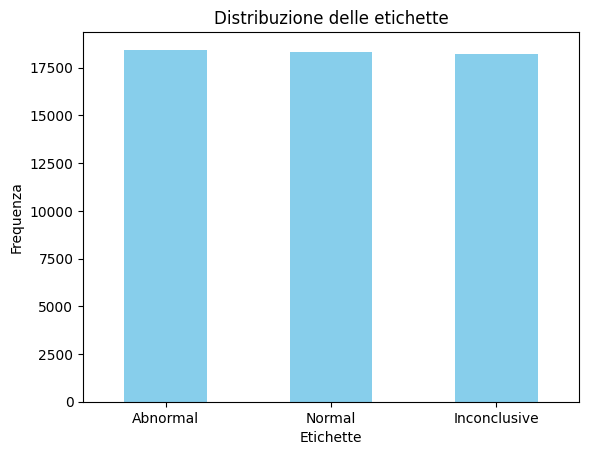

In [ ]:
import matplotlib.pyplot as plt

distribuzione.plot(kind='bar', color='skyblue')
plt.title('Distribuzione delle etichette')
plt.xlabel('Etichette')
plt.ylabel('Frequenza')
plt.xticks(rotation=0)
plt.show()


A fronte di questi dati, la distribuzione delle etichette risulta fortemente bilanciata. A questo punto si può procedere con la rimozione delle righe con una sola feature di differenza dal dataset.

In [ ]:
# Lista per conservare solo un indice per ciascun gruppo duplicato "1-colonna-diversa"
indices_to_keep = set()
indices_to_remove = set()

for _, group in grouped:
    if len(group) < 2:
        continue
    rows = group[feature_cols].astype(str).values
    all_exact = True
    for i in range(len(rows)):
        for j in range(i+1, len(rows)):
            diff = (rows[i] != rows[j]).sum()
            if diff != 1:
                all_exact = False
                break
        if not all_exact:
            break
    if all_exact:
        # Tieni solo il primo indice del gruppo
        keep_idx = group.index[0]
        indices_to_keep.add(keep_idx)

        # Tutti gli altri indici sono da rimuovere
        for idx in group.index[1:]:
            indices_to_remove.add(idx)

# Applichiamo la rimozione solo degli indici extra (duplicati)
df = df.drop(index=indices_to_remove).reset_index(drop=True)

# Stampa riepilogo
print(f"Rimosse {len(indices_to_remove)} righe duplicate (differenti solo per 1 colonna), conservandone una per gruppo.")



Rimosse 4753 righe duplicate (differenti solo per 1 colonna), conservandone una per gruppo.


In [ ]:
# Colonne chiave e feature
group_cols = ['Name', 'Gender', 'Blood Type']
feature_cols = [col for col in df.columns if col not in group_cols]

# Raggruppamento
grouped = df.groupby(group_cols)

# Conta i gruppi in cui tutte le coppie differiscono per esattamente n colonne
def count_groups_with_exact_diff(n_diff):
    count = 0
    for _, group in grouped:
        if len(group) < 2:
            continue
        rows = group[feature_cols].astype(str).values
        all_exact = True
        for i in range(len(rows)):
            for j in range(i+1, len(rows)):
                diff = (rows[i] != rows[j]).sum()
                if diff != n_diff:
                    all_exact = False
                    break
            if not all_exact:
                break
        if all_exact:
            count += 1
    return count

# Conta i gruppi con esattamente 1 o 2 colonne diverse
count_eq_1 = count_groups_with_exact_diff(1)
count_eq_2 = count_groups_with_exact_diff(2)

print(f"Gruppi in cui tutte le righe differiscono per esattamente 1 colonna: {count_eq_1}")
print(f"Gruppi in cui tutte le righe differiscono per esattamente 2 colonne: {count_eq_2}")

Gruppi in cui tutte le righe differiscono per esattamente 1 colonna: 0
Gruppi in cui tutte le righe differiscono per esattamente 2 colonne: 0


In [ ]:
# Specifica il nome della colonna target (ad esempio 'label')
target_col = 'Test Results'

# Mostra la distribuzione delle etichette
distribuzione = df[target_col].value_counts()

# Mostra anche le percentuali
percentuali = df[target_col].value_counts(normalize=True) * 100

# Stampa i risultati
print("Distribuzione assoluta delle etichette:")
print(distribuzione)

print("\nDistribuzione percentuale delle etichette:")
print(percentuali)

Distribuzione assoluta delle etichette:
Test Results
Abnormal        16865
Normal          16742
Inconclusive    16606
Name: count, dtype: int64

Distribuzione percentuale delle etichette:
Test Results
Abnormal        33.586920
Normal          33.341963
Inconclusive    33.071117
Name: proportion, dtype: float64


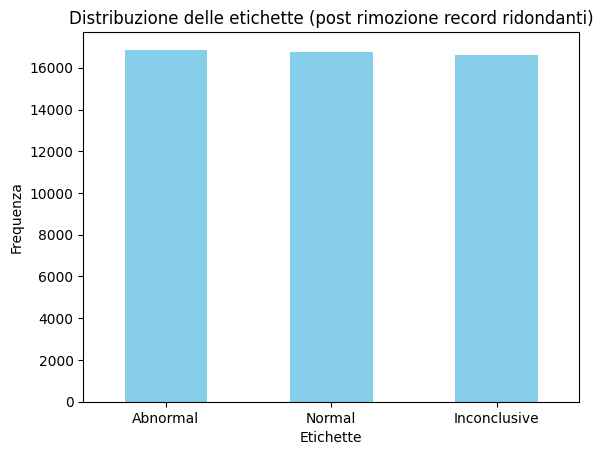

In [ ]:
distribuzione.plot(kind='bar', color='skyblue')
plt.title('Distribuzione delle etichette (post rimozione record ridondanti)')
plt.xlabel('Etichette')
plt.ylabel('Frequenza')
plt.xticks(rotation=0)
plt.show()

L'eliminazione delle righe che hanno in comune Name, Gender e Blood Type, ma che differiscono di una sola colonna, ha lasciato sostanzialmente inviarata la distribuzione delle etichette della Y Test Results. Il dataset si mantiene quindi bilanciato.

L'eliminazione delle righe che hanno in comune Name, Gender e Blood Type, ma che differiscono di una sola colonna, ha lasciato sostanzialmente inviarata la distribuzione delle etichette della Y Test Results. Il dataset si mantiene quindi bilanciato.

## Rimozione della colonna Room Number
La feature Room Number viene rimossa in quanto l'abbiamo ritenuta inutile ai fini dell'analisi e dell'addestramento di un modello di ML.


In [ ]:
df.drop(columns=['Room Number'], inplace=True)
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
# Controllo outlier o valori anomali sulle numeriche
print("Valori Billing Amount anomali:", df[df['Billing Amount'] < 0].shape[0])

Valori Billing Amount anomali: 96


elimino le 96 righe che hanno un billing amount negativo

In [ ]:
df = df[df['Billing Amount'] >= 0]

# Natural Language Processing



In questa fase applichiamo tecniche di anonimizzazione e pseudoanonimizzazione alle note testuali: rileviamo entità sensibili (nomi di persone, date o luoghi) mediante NER (Named Entity Recognition) e pattern Regex (Regular Expressions), quindi le sostituiamo con tag standard (es. [PERSON]). Questo produce un testo riutilizzabile in modo sicuro e facilita analisi successive; effettuiamo anche controlli campionari per verificare la qualità del riconoscimento.

In [ ]:
df_nlp = df.copy()
df_nlp.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
len(df_nlp)

50117

# Creazione delle note cliniche

Per arricchire il dataset è stata generata per ogni riga una **nota clinica sintetica** in linguaggio naturale. A tal fine sono stati definiti tre **template testuali** con struttura e lessico diversi, all’interno dei quali sono stati inseriti i valori specifici delle feature (es. *Name*, *Age*, *Gender*, *Hospital*, *Medical Condition*, ecc.).

Questa tecnica consente di creare descrizioni cliniche realistiche e variate, simulando la documentazione che normalmente si trova nelle cartelle sanitarie elettroniche. L’approccio a template garantisce sia **coerenza strutturale** tra le note, sia una sufficiente **variabilità linguistica**, utile per testare successivi metodi di elaborazione del linguaggio naturale.

In questo modo, ciascun record numerico e tabellare del dataset viene accompagnato da una rappresentazione testuale in forma discorsiva, che potrà essere utilizzata per l'anonimizzazione tramite regex o NER.


In [ ]:
import pandas as pd
import random

def generate_clinical_note(row):
    """Genera una nota clinica basata sui dati della tupla"""
    templates = [
        f"{row['Name']}, ({row['Gender']}, {row['Age']} years old, blood type {row['Blood Type']}) was admitted in {row['Admission Type']} mode. The patient was hospitalized on {row['Date of Admission']} to {row['Hospital']} for {row['Medical Condition']}. Patient insurance is {row['Insurance Provider']}. The Dr. {row['Doctor']} prescribed the {row['Medication']}. Tests have shown {row['Test Results']} results. The patient  was discharged on {row['Discharge Date']} with a billing amount in this range: ${row['Billing Amount']:.2f}. ",

        f"{row['Name']}: {row['Age']} years old, {row['Gender']}, blood type {row['Blood Type']}, was admitted on {row['Date of Admission']} at {row['Hospital']} due to {row['Medical Condition']}, under {row['Admission Type']} admission. Insurance provider: {row['Insurance Provider']}. The attending physician, Dr. {row['Doctor']}, prescribed {row['Medication']}. Test results indicated {row['Test Results']}. The patient was discharged on {row['Discharge Date']} with a total bill of ${row['Billing Amount']:.2f}.",

        f"On {row['Date of Admission']}, {row['Name']} ({row['Gender']}, {row['Age']} years old, blood type {row['Blood Type']}) was admitted to {row['Hospital']} for treatment of {row['Medical Condition']} ({row['Admission Type']} admission). Covered by {row['Insurance Provider']}, the patient was treated by Dr. {row['Doctor']} who prescribed {row['Medication']}. Tests revealed {row['Test Results']}. Discharge occurred on {row['Discharge Date']} with a billing charge of ${row['Billing Amount']:.2f}."
        ]

    return random.choice(templates)

# Genera le note per tutte le righe
df_nlp['clinical_note'] = df_nlp.apply(generate_clinical_note, axis=1)

# Stampa solo le prime 5
for i, row in df_nlp.head(5).iterrows():
    print(f"--- RIGA {i+1} ---")
    print(row['clinical_note'])
    print()

--- RIGA 1 ---
On 2024-01-31, Bobby Jackson (Male, 30 years old, blood type B-) was admitted to Sons and Miller for treatment of Cancer (Urgent admission). Covered by Blue Cross, the patient was treated by Dr. Matthew Smith who prescribed Paracetamol. Tests revealed Normal. Discharge occurred on 2024-02-02 with a billing charge of $18856.28.

--- RIGA 2 ---
On 2019-08-20, Leslie Terry (Male, 62 years old, blood type A+) was admitted to Kim Inc for treatment of Obesity (Emergency admission). Covered by Medicare, the patient was treated by Dr. Samantha Davies who prescribed Ibuprofen. Tests revealed Inconclusive. Discharge occurred on 2019-08-26 with a billing charge of $33643.33.

--- RIGA 3 ---
On 2022-09-22, Danny Smith (Female, 76 years old, blood type A-) was admitted to Cook PLC for treatment of Obesity (Emergency admission). Covered by Aetna, the patient was treated by Dr. Tiffany Mitchell who prescribed Aspirin. Tests revealed Normal. Discharge occurred on 2022-10-07 with a billi

Il risultato mostra le note cliniche correttamente create.

In [ ]:
df_nlp.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,clinical_note
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol,Normal,"On 2024-01-31, Bobby Jackson (Male, 30 years o..."
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen,Inconclusive,"On 2019-08-20, Leslie Terry (Male, 62 years ol..."
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,Emergency,2022-10-07,Aspirin,Normal,"On 2022-09-22, Danny Smith (Female, 76 years o..."
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,Elective,2020-12-18,Ibuprofen,Abnormal,"Andrew Watts, (Female, 28 years old, blood typ..."
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,Urgent,2022-10-09,Penicillin,Abnormal,"On 2022-09-19, Adrienne Bell (Female, 43 years..."


### Generalizzazione di Age e Billing Amount
Prima di procedere con l'anonimizzazione, generalizzeremo i dati.

Convertiremo l'età in fasce di età e i valori monetari ("Billing Amount") in range specifici. Questo ci aiuterà a ridurre la granularità dei dati, a renderli meno identificabili e a semplificare l'analisi successiva.

In [ ]:
def get_age_group(age):
    age = int(age)
    if 13 <= age <= 24:
        return "young"
    elif 25 <= age <= 38:
        return "adult"
    elif 39 <= age <= 59:
        return "middle age"
    elif 60 <= age <= 86:
        return "elderly"
    else:
        return "[AGE]"

def generalize_billing_amount(amount):
    amount = int(float(amount))  # Ignora i decimali, prende solo la parte intera
    if amount <= 10000:
        return "0-10.000"
    elif amount <= 20000:
        return "10.001-20.000"
    elif amount <= 30000:
        return "20.001-30.000"
    elif amount <= 40000:
        return "30.001-40.000"
    elif amount <= 50000:
        return "40.001-50.000"
    else:
        return ">50.000"


Dopo la generalizzazione avremo in ordine come fasce d'età: young, adult, middle age, elderly. E come range per il billing amount avremo: 0-10.000\$, 10.001-20.000\$, 20.001-30.000\$, 30.001-40.000\$, 40.001-50.000\$, >50.000\$

## Anonimizzazione dei dati sensibli




Secondo il **Regolamento Generale sulla Protezione dei Dati** (GDPR), sono considerati dati personali tutte le informazioni che identificano o rendono identificabile una persona fisica, direttamente o indirettamente. Inoltre, i dati relativi alla salute rientrano nelle categorie particolari di dati personali e richiedono protezioni rafforzate.

Il **GDPR** non fornisce un elenco rigido di campi da anonimizzare, ma richiede che l’anonimizzazione sia tale da rendere impossibile (o estremamente improbabile) la re-identificazione dell’interessato.

Nel dataset analizzato (circa 50.000 record, con distribuzione bilanciata ddelle varie feature), abbiamo deciso di applicare il seguente criterio:

* Anonimizzare gli identificatori diretti, che collegano immediatamente un record a una persona fisica.

* Generalizzare gli identificatori indiretti ad alto rischio, che potrebbero permettere re-identificazione se combinati ad altri dati.

* Mantenere i dati sanitari e clinici, poiché, una volta scollegati dagli identificatori, non consentono la re-identificazione nel contesto del dataset.


**Scelte applicate**

**Anonimizzati:**

* Name → identificatore diretto (nome e cognome del paziente).

* Doctor → identificatore diretto (dato personale di un professionista sanitario).

* Hospital → potenziale identificatore (soprattutto in contesti locali con poche strutture).

* Insurance Provider → identificatore indiretto, legato univocamente all’assicurato.

* Date of Admission e Discharge Date → per ridurre il rischio di identificazione tramite cronologia.

**Generalizzati:**
 * Age → in fasce d'età young, adult, middle age, elderly.
 * Billing Amount → in range monetari: 0-10.000\$, 10.001-20.000\$, 20.001-30.000\$, 30.001-40.000\$, 40.001-50.000\$, >50.000\$.


**Campi non modificati:**

I restanti campi (Gender, Blood Type, Medical Condition, Admission Type, Medication, Test Results) sono mantenuti perché necessari per analisi clinico-statistiche e, dopo la rimozione degli identificatori diretti e la riduzione di granularità di importi e età, presentano un rischio residuale ritenuto accettabile nel contesto (dataset ampio e bilanciato).



#### Gold Dataset

Il **gold dataset** (o *gold standard*) rappresenta un insieme di dati di riferimento di alta qualità, in cui le entità sensibili sono state **annotate manualmente**. Questo dataset non viene utilizzato per l’addestramento dei modelli, ma funge da **benchmark oggettivo** per valutarne le prestazioni.

Nel nostro caso, abbiamo costruito un gold dataset annotando le note cliniche generate con le principali entità da riconoscere, come **nomi di pazienti e medici (PERSON), date (DATE), ospedali e assicurazioni (ORG)**. Ogni testo è accompagnato da una lista di etichette che identificano con precisione i segmenti sensibili.

Confrontando i risultati prodotti dalla RegEx e dai modelli NER con le annotazioni del
gold dataset, possiamo calcolare metriche come **accuracy, precision, recall e F1-score**, valutando così quanto i modelli siano efficaci nell’individuare e anonimizzare le entità rilevanti. Questo approccio garantisce una valutazione trasparente e riproducibile delle tecniche di anonimizzazione.

In [ ]:
import json
import pandas as pd

# Leggi il file JSON (es. "gold_data.json")
with open("goldDataPerson.json", "r", encoding="utf-8") as f:
    gold_data = json.load(f)  # carica il JSON in una lista di dizionari

# Ora puoi fare come prima
texts = [item["text"] for item in gold_data]
entities = [item["entities"] for item in gold_data]

df_gold = pd.DataFrame({"text": texts, "entities": entities})


In [ ]:
df_gold.head()

,text,entities
0,"Bobby Jackson: 30 years old, Male, blood type ...","[{'text': 'Bobby Jackson', 'label': 'PERSON'},..."
1,"On 2019-08-20, Leslie Terry (Male, 62 years ol...","[{'text': 'Leslie Terry', 'label': 'PERSON'}, ..."
2,"Danny Smith, (Female, 76 years old, blood type...","[{'text': 'Danny Smith', 'label': 'PERSON'}, {..."
3,"Andrew Watts: 28 years old, Female, blood type...","[{'text': 'Andrew Watts', 'label': 'PERSON'}, ..."
4,"Adrienne Bell: 43 years old, Female, blood typ...","[{'text': 'Adrienne Bell', 'label': 'PERSON'},..."


### Metriche utilizzate

Per valutare le prestazioni dei modelli sul nostro **gold dataset** utilizziamo quattro metriche fondamentali della classificazione: **accuracy, precision, recall e F1-score**.

* **Accuracy**: misura la percentuale di entità correttamente identificate rispetto al totale delle entità considerate (vere e predette). Nel nostro contesto indica, in generale, quanto il modello “indovina” correttamente le entità PERSON, ORG e DATE.

* **Precision**: rappresenta la proporzione di entità che il modello ha riconosciuto e che erano effettivamente corrette. In altre parole, ci dice quanto il modello è “selettivo”, evitando falsi positivi (es. etichettare un ospedale come nome di persona).

* **Recall**: misura la percentuale di entità presenti nel gold dataset che il modello è riuscito effettivamente a trovare. In pratica, indica quanto il modello è “sensibile” nel riconoscere tutte le entità rilevanti, evitando falsi negativi (es. non riconoscere una data importante nel testo).

* **F1-score**: è la media armonica tra precision e recall, e fornisce una misura bilanciata tra le due. Nel nostro caso, è particolarmente utile perché evita che un modello con alta precision ma bassa recall, o viceversa, venga considerato buono solo su una delle due dimensioni.

Nel nostro progetto, queste metriche vengono calcolate confrontando le entità annotate nel **gold dataset** con quelle riconosciute dai modelli. Questo ci permette di avere una valutazione **quantitativa e trasparente** delle prestazioni della RegEx e dei diversi modelli (spaCy: *sm*, *md*, *lg*, Flair e Bert) e di capire quale sia il più efficace per l’anonimizzazione dei dati sensibili nelle note cliniche.



### Anonimizzazione tramite regex
Le espressioni regolari (regex) sono sequenze di caratteri che definiscono un modello di ricerca all’interno di stringhe di testo. Vengono comunemente utilizzate per individuare, sostituire o manipolare porzioni di testo secondo regole ben precise.

Nel contesto di questo progetto, le regex sono state impiegate per riconoscere e anonimizzare automaticamente le colonne identificate come contenenti dati sensibili (es. Name, Doctor, Insurance Provider, ecc.), sostituendo i valori originali con etichette o codici anonimi.

Non è stata invece applicata la regex alla colonna Hospital: trattandosi di un attributo con un elevato numero di valori univoci e una variabilità simile a quella dei nomi propri, l’utilizzo di pattern regex avrebbe potuto generare ambiguità e falsi positivi (es. confondere un nome di ospedale con un nome di persona).

In [ ]:
import re
from datetime import datetime

def anonymize_text(text, patient_id=None):
    """Anonimizza il testo sostituendo dati sensibili"""

    # PRIMA sostituisci i dottori (più specifico)
    text = re.sub(r'Dr\.\s+[A-Z][a-z]+\s+[A-Z][a-z]+', 'Doctor [DOCTOR]', text)
    text = re.sub(r'The Dr\.\s+[A-Z][a-z]+\s+[A-Z][a-z]+', 'The Dr. [DOCTOR]', text)

    # sostituisci i nomi dei pazienti in contesti specifici
    text = re.sub(r'The patient ([A-Z][a-z]+\s+[A-Z][a-z]+)', r'[PATIENT]', text)
    text = re.sub(r'patient:\s*([A-Z][a-z]+\s+[A-Z][a-z]+)', r'patient: [PATIENT]', text)

    # Sostituisci anche nomi all'inizio della frase (Leslie Terry, Danny Smith, ecc.)
    text = re.sub(r'^([A-Z][a-z]+\s+[A-Z][a-z]+)', '[PATIENT]', text)
    text = re.sub(r'\b([A-Z][a-z]+\s+[A-Z][a-z]+)\s*\(', '[PATIENT] (', text)

    # Sostituisci date specifiche con periodi generici
    text = re.sub(r'\b\d{4}-\d{2}-\d{2}\b', '[DATE]', text)
    text = re.sub(r'\b\d{1,2}/\d{1,2}/\d{4}\b', '[DATE]', text)

    # Sostituisci assicurazioni con categoria generica
    insurances = ['Aetna', 'Blue Cross', 'Cigna', 'UnitedHealthcare', 'Medicare']
    for ins in insurances:
        text = re.sub(rf'\b{ins}\b', '[INSURANCE]', text)

    # Sostituisci età in fasce
    def replace_age(match):
        age_str = match.group(1)
        age_group = get_age_group(age_str)
        return f"{age_group} ({age_str} years old)"

    # Cerca l'età nel formato: "XX anni" (anche all'interno di parentesi)
    text = re.sub(r'(\d{2}) years old', lambda m: get_age_group(m.group(1)), text)

    # Cerca importi come $18856.28 o $18856
    def repl(m):
        amount_str = m.group(1).replace(",", "")
        return f"${generalize_billing_amount(amount_str)}"
    # Pattern per matchare numeri con o senza decimali
    return re.sub(r'\$([0-9]+(?:\.[0-9]+)?)', repl, text)

    return text

# Applica l'anonimizzazione
df_nlp['nota_anonimizzata_regex'] = df_nlp['clinical_note'].apply(anonymize_text)
df_nlp.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,clinical_note,nota_anonimizzata_regex
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol,Normal,"On 2024-01-31, Bobby Jackson (Male, 30 years o...","On [DATE], [PATIENT] (Male, adult, blood type ..."
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen,Inconclusive,"On 2019-08-20, Leslie Terry (Male, 62 years ol...","On [DATE], [PATIENT] (Male, elderly, blood typ..."
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,Emergency,2022-10-07,Aspirin,Normal,"On 2022-09-22, Danny Smith (Female, 76 years o...","On [DATE], [PATIENT] (Female, elderly, blood t..."
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,Elective,2020-12-18,Ibuprofen,Abnormal,"Andrew Watts, (Female, 28 years old, blood typ...","[PATIENT], (Female, adult, blood type O+) was ..."
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,Urgent,2022-10-09,Penicillin,Abnormal,"On 2022-09-19, Adrienne Bell (Female, 43 years...","On [DATE], [PATIENT] (Female, middle age, bloo..."


In [ ]:
len(df_nlp)

50117

#### Valutazione della regex

In [ ]:
import json
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Carica il gold standard
with open("goldDataPerson.json", "r") as f:
    gold_data = json.load(f)

# Funzione per verificare se un'entità gold è stata anonimizzata correttamente
def is_entity_anonymized(entity_text, entity_label, anonymized_text):
    label_map = {
        "PERSON": "[PATIENT]",
        "DATE": "[DATE]",
        "ORG": "[INSURANCE]",  # semplifico: tutte le ORG nel dataset sono assicurazioni/ospedali
    }
    if entity_label not in label_map:
        return False
    return (entity_text not in anonymized_text) and (label_map[entity_label] in anonymized_text)

# Liste per metriche
y_true = []
y_pred = []

for sample in gold_data:
    original_text = sample["text"]
    anonymized_text = anonymize_text(original_text)

    for ent in sample["entities"]:
        ent_text = ent["text"]
        ent_label = ent["label"]

        # gold = 1 significa che questa entità va anonimizzata
        y_true.append(1)

        # pred = 1 se la regex ha sostituito correttamente, altrimenti 0
        if is_entity_anonymized(ent_text, ent_label, anonymized_text):
            y_pred.append(1)
        else:
            y_pred.append(0)

# Calcolo metriche
precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)
accuracy = accuracy_score(y_true, y_pred)

print("REPORT ANONIMIZZAZIONE TRAMITE REGEX")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")


REPORT ANONIMIZZAZIONE TRAMITE REGEX
Accuracy:  0.8000
Precision: 1.0000
Recall:    0.8000
F1-score:  0.8889


I valori ottenuti mostrano ottima precisione (1.0), cioè ogni volta che la regex interviene lo fa correttamente senza introdurre falsi positivi. La recall (0.8) e di conseguenza l’F1 (0.89) risultano invece più basse, perché una parte delle entità non viene anonimizzata.

L’accuracy riflette il fatto che il 20% delle entità gold non è stato anonimizzato. Questo valore è coerente con la recall (0.80): il sistema riesce ad anonimizzare correttamente 4 entità su 5, mentre la restante parte sfugge al pattern regex.

Questo è dovuto principalmente alle organizzazioni ospedaliere, su cui la regex non è stata applicata: il dataset contiene infatti circa 39.000 valori univoci su 50.000, quindi sarebbe impraticabile gestirli con semplici pattern regolari.

### Risposta alla RQ 1: Quanto sono efficaci le regular expression nell’anonimizzare automaticamente le note cliniche generate?

La principale criticità riguarda le organizzazioni ospedaliere: il dataset contiene infatti circa 39.000 valori univoci su 50.000, rendendo impraticabile coprirli con semplici pattern regolari. Le regex funzionano bene per categorie standardizzabili (date, età, importi, alcuni nomi propri), ma non riescono a scalare su domini estremamente variabili come gli ospedali o le cliniche.

In conclusione, l’approccio basato su regex è molto affidabile in termini di correttezza, ma mostra una copertura limitata. Per ottenere un’anonimizzazione completa sarebbe necessario integrare metodi più flessibili, come modelli NER, in grado di gestire la varietà lessicale del dominio medico.

### Tramite NER

La **Named Entity Recognition (NER)** è una tecnica di *Natural Language Processing (NLP)* che permette di identificare e classificare automaticamente in un testo determinate entità, come nomi di persona, luoghi, organizzazioni, date o valori numerici. A differenza delle espressioni regolari, che si basano su regole rigide e pattern statici, la NER sfrutta modelli di **apprendimento automatico** in grado di riconoscere le entità anche in contesti diversi, con maggiore flessibilità e capacità di generalizzazione.

Nel nostro caso la NER è stata utilizzata con lo stesso obiettivo delle regex, ovvero **anonimizzare i dati sensibili**, ma con un approccio più potente.

Rispetto all’esperimento precedente, abbiamo incluso anche la colonna *Hospital* nell’anonimizzazione: la NER infatti dovrebbe essere in grado di distinguere correttamente i nomi delle strutture sanitarie da quelli delle persone, riducendo il rischio di confusione.

Per implementare questa tecnica ci siamo basati su **modelli pre-addestrati** disponibili nelle principali librerie NLP, in particolare:

* **spaCy**, per l’estrazione rapida di entità con modelli leggeri e facilmente integrabili;
* **Flair**, che permette di combinare diversi embeddings e ottenere prestazioni elevate nella classificazione delle entità;
* **BERT**, che grazie al contesto bidirezionale offre una maggiore accuratezza nel riconoscimento delle entità complesse.

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 1.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 16.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 74.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Utilizzo di Spacy

Per implementare la Named Entity Recognition abbiamo utilizzato **spaCy**, una delle librerie più diffuse e performanti per il NLP. SpaCy mette a disposizione modelli linguistici già **pre-addestrati** su grandi corpora di testo, che permettono di riconoscere automaticamente entità come nomi di persona, organizzazioni, luoghi, date e valori numerici.

In particolare, nel nostro progetto abbiamo testato tre modelli della lingua inglese forniti da spaCy:

* **en\_core\_web\_sm**: modello “small”, leggero e veloce, adatto a scenari in cui le risorse computazionali sono limitate. Ha prestazioni più basse ma tempi di esecuzione molto rapidi.
* **en\_core\_web\_md**: modello “medium”, che include vettori semantici a 300 dimensioni. Offre un buon compromesso tra accuratezza e velocità, risultando più preciso rispetto alla versione *sm*.
* **en\_core\_web\_lg**: modello “large”, con vettori semantici ad alta dimensionalità e una copertura linguistica più ampia. È il più pesante in termini di memoria, ma garantisce risultati migliori nell’identificazione delle entità.

L’uso combinato di questi modelli ci consente di confrontare **prestazioni e compromessi**: da un lato la rapidità di esecuzione (*sm*), dall’altro la maggiore accuratezza nell’anonimizzazione dei dati sensibili (*lg*). In questo modo possiamo scegliere consapevolmente il modello più adatto in base agli obiettivi di precisione e alle risorse disponibili.


In [ ]:
import json
import spacy
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Carica il gold dataset dal file JSON
with open("goldDataPerson.json", "r", encoding="utf-8") as f:
    gold_data = json.load(f)

# Funzione originale di filtro NER
def filter_entities_for_comparison(text, nlp):
    """Filtra le entità per confronto NER ignorando DATE con età e MONEY."""
    doc = nlp(text)
    filtered = []

    for ent in doc.ents:
        context = text[max(0, ent.start_char-10): ent.end_char+10].lower()
        if ent.label_ == "DATE" and "years old" in context:
            continue
        if ent.label_ == "MONEY":
            continue
        if ent.label_ in ["PERSON", "ORG", "DATE"]:
            filtered.append({"text": ent.text, "label": ent.label_})
    return filtered

# Funzione di valutazione
def evaluate_ner_verbose(gold_data, ner_fn, model_name=""):
    y_true, y_pred = [], []

    total_gold_entities = 0
    total_pred_entities = 0
    correct_predictions = 0

    print(f"\n📋 Processando {len(gold_data)} campioni dal gold dataset...")

    for i, sample in enumerate(gold_data, 1):
        if i <= 3:  # Mostra i primi 3 campioni
            print(f"\n--- Campione {i} ---")
            print(f"Testo: {sample['text'][:100]}...")

        gold_entities = {(e["text"], e["label"]) for e in sample["entities"]}
        pred_entities = {(e["text"], e["label"]) for e in ner_fn(sample["text"])}

        total_gold_entities += len(gold_entities)
        total_pred_entities += len(pred_entities)
        correct_predictions += len(gold_entities & pred_entities)

        if i <= 3:
            print(f"Gold entities: {list(gold_entities)}")
            print(f"Pred entities: {list(pred_entities)}")
            print(f"Corrette: {list(gold_entities & pred_entities)}")

        for ent in gold_entities:
            y_true.append(ent[1])
            y_pred.append(ent[1] if ent in pred_entities else "O")

        for ent in pred_entities - gold_entities:
            y_true.append("O")
            y_pred.append(ent[1])

    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="weighted", zero_division=0
    )

    # Calcola l'accuracy standard usando sklearn
    accuracy = accuracy_score(y_true, y_pred)

    print(f"\n" + "="*50)
    print(f"📊 STATISTICHE COMPLETE:")
    print(f"🔹 Modello: {model_name}")
    print(f"📝 Campioni processati: {len(gold_data)}")
    print(f"📊 Accuracy standard: {accuracy*100:.1f}%")  # Aggiunto accuracy standard
    print(f"\nPrecision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-score:  {f1:.4f}")

    return precision, recall, f1, accuracy  # Aggiunto accuracy nel return

# Lista modelli
models = ["en_core_web_sm", "en_core_web_md", "en_core_web_lg"]

# Ciclo su tutti i modelli
for model_name in models:
    nlp = spacy.load(model_name)

    # Funzione wrapper che prende solo text
    def ner_fn(text, nlp=nlp):
        return filter_entities_for_comparison(text, nlp)

    evaluate_ner_verbose(gold_data, ner_fn, model_name=model_name)


📋 Processando 50 campioni dal gold dataset...

--- Campione 1 ---
Testo: Bobby Jackson: 30 years old, Male, blood type B-, was admitted on 2024-01-31 at Sons and Miller due ...
Gold entities: [('Blue Cross', 'ORG'), ('Bobby Jackson', 'PERSON'), ('2024-01-31', 'DATE'), ('Dr. Matthew Smith', 'PERSON'), ('2024-02-02', 'DATE'), ('Sons and Miller', 'ORG')]
Pred entities: [('Cancer', 'ORG'), ('Bobby Jackson', 'PERSON'), ('2024-01-31', 'DATE'), ('Miller', 'PERSON'), ('Blue Cross', 'ORG'), ('Matthew Smith', 'PERSON'), ('Urgent', 'ORG'), ('Sons', 'ORG'), ('2024-02-02', 'DATE')]
Corrette: [('Blue Cross', 'ORG'), ('2024-01-31', 'DATE'), ('2024-02-02', 'DATE'), ('Bobby Jackson', 'PERSON')]

--- Campione 2 ---
Testo: On 2019-08-20, Leslie Terry (Male, 62 years old, blood type A+) was admitted to Kim Inc for treatmen...
Gold entities: [('2019-08-20', 'DATE'), ('Dr. Samantha Davies', 'PERSON'), ('Leslie Terry', 'PERSON'), ('Kim Inc', 'ORG'), ('2019-08-26', 'DATE'), ('Medicare', 'ORG')]
Pred entities

Dai test effettuati sui 50 campioni del gold dataset, possiamo osservare alcune differenze nelle prestazioni dei tre modelli di spaCy.

* **en\_core\_web\_sm**: ha mostrato un’**accuracy del 44%** con valori di precision e recall relativamente bassi (≈0.38–0.44). Questo conferma che il modello “small”, pur essendo veloce, non riesce a catturare bene le entità in testi complessi come quelli sanitari. In diversi casi, ha confuso organizzazioni con persone (“Miller” → PERSON) o ha introdotto entità spurie (“Urgent” → ORG).

* **en\_core\_web\_md**: sorprendentemente ha ottenuto risultati **peggiori dello small** in termini di accuracy (39,2%), pur con una precision leggermente più alta (0.46). Il modello medio sembra introdurre più falsi positivi (es. “Kim Inc” → PERSON invece che ORG, “Inconclusive” → PERSON), riducendo la qualità complessiva delle previsioni. Questo dimostra che avere vettori semantici più ricchi non garantisce automaticamente un miglioramento, soprattutto se il dominio del testo è molto diverso dal training set originale.

* **en\_core\_web\_lg**: è risultato il modello migliore, con un’**accuracy del 51,9%** e un F1-score di circa 0.49. Pur non essendo perfetto, ha identificato correttamente più entità rispetto agli altri modelli e ha ridotto il numero di errori grossolani. Anche qui si notano alcune confusioni, come entità spurie (“Ibuprofen” → ORG, “Female” → ORG), ma nel complesso riesce a catturare meglio le informazioni chiave (PERSON, ORG, DATE).

In sintesi:

* Lo **small** è troppo limitato per un contesto delicato come quello sanitario.
* Il **medium** non porta vantaggi tangibili e introduce più rumore.
* Il **large** è il più affidabile, pur con margini di miglioramento, e rappresenta la scelta migliore per valutare le tecniche di anonimizzazione.


## Utilizzo di Bert

Oltre a spaCy, abbiamo valutato anche l’uso di modelli transformer-based, in particolare BERT.
Abbiamo utilizzato il modello pre-addestrato dbmdz/bert-large-cased-finetuned-conll03-english, ottimizzato sul dataset CoNLL-2003, che include entità come PERSON, ORG, LOC, MISC.

Rispetto a spaCy, BERT adotta un approccio più potente basato su deep learning contestuale: ogni parola viene rappresentata in funzione del contesto circostante, consentendo al modello di disambiguare meglio entità ambigue o distribuite su più token.

Le categorie di BERT sono state mappate sulle stesse usate con spaCy, in modo da avere un confronto uniforme (PER → PERSON, ORG/MISC/LOC → ORG).

Poiché il modello non prevede direttamente entità come DATE, queste non sono coperte, e ci siamo concentrati principalmente su PERSON e ORG.



In [ ]:
import json
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Carica il gold dataset dal file JSON
with open("goldDataPerson.json", "r", encoding="utf-8") as f:
    gold_data = json.load(f)

def setup_bert_ner():
    """Setup del modello BERT per NER."""
    model_name = "dbmdz/bert-large-cased-finetuned-conll03-english"

    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForTokenClassification.from_pretrained(model_name)

    ner_pipeline = pipeline("ner",
                           model=model,
                           tokenizer=tokenizer,
                           aggregation_strategy="simple")
    return ner_pipeline, model_name

def filter_bert_entities_for_comparison(text, ner_pipeline):
    """Filtra le entità BERT per confronto NER ignorando età e seguendo lo stesso pattern di spaCy."""

    # Esegui il NER
    results = ner_pipeline(text)

    # Mappa le label del modello BERT alle categorie standard
    label_mapping = {
        "PER": "PERSON",
        "PERSON": "PERSON",
        "ORG": "ORG",
        "LOC": "ORG",  # Le location vengono mappate come ORG per coerenza
        "MISC": "ORG",  # MISC spesso contiene organizzazioni
    }

    filtered = []

    for ent in results:
        entity_text = ent["word"]
        entity_label = ent["entity_group"]

        # Controlla se è una label che ci interessa
        if entity_label not in label_mapping:
            continue

        # Stesso filtro di spaCy: ignora età
        context = text[max(0, ent["start"]-10): ent["end"]+10].lower()
        if "years old" in context and any(d.isdigit() for d in entity_text):
            continue

        # Mappa la label
        mapped_label = label_mapping[entity_label]

        # BERT non ha DATE nativamente, quindi non dobbiamo filtrare MONEY/DATE
        # Manteniamo solo PERSON e ORG come spaCy
        if mapped_label in ["PERSON", "ORG"]:
            filtered.append({"text": entity_text, "label": mapped_label})

    return filtered

def evaluate_ner_with_debug(gold_data, ner_fn, model_name=""):
    """Funzione di valutazione con debug per vedere cosa sta succedendo."""
    y_true, y_pred = [], []

    total_gold_entities = 0
    total_pred_entities = 0
    correct_predictions = 0

    print(f"\n📋 Processando {len(gold_data)} campioni dal gold dataset...")

    for i, sample in enumerate(gold_data, 1):
        if i <= 3:  # Mostra dettagli per i primi 3 campioni
            print(f"\n--- Campione {i} ---")
            print(f"Testo: {sample['text'][:100]}...")

        gold_entities = {(e["text"], e["label"]) for e in sample["entities"]}
        pred_entities = {(e["text"], e["label"]) for e in ner_fn(sample["text"])}

        total_gold_entities += len(gold_entities)
        total_pred_entities += len(pred_entities)

        # Conta le predizioni corrette
        correct_predictions += len(gold_entities & pred_entities)

        if i <= 3:  # Debug dettagli per i primi 3
            print(f"Gold entities: {list(gold_entities)}")
            print(f"Pred entities: {list(pred_entities)}")
            print(f"Corrette: {list(gold_entities & pred_entities)}")

        for ent in gold_entities:
            y_true.append(ent[1])
            y_pred.append(ent[1] if ent in pred_entities else "O")

        for ent in pred_entities - gold_entities:
            y_true.append("O")
            y_pred.append(ent[1])

    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="weighted", zero_division=0
    )

    # Calcola l'accuracy standard usando sklearn
    accuracy = accuracy_score(y_true, y_pred)

    print(f"\n" + "="*50)
    print(f"📊 STATISTICHE COMPLETE:")
    print(f"🔹 Modello: {model_name}")
    print(f"📝 Campioni processati: {len(gold_data)}")
    print(f"📊 Accuracy standard: {accuracy*100:.1f}%")  # Aggiunto accuracy standard
    print(f"\nPrecision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-score:  {f1:.4f}")

    return precision, recall, f1, accuracy  # Aggiunto accuracy nel return

# Setup del modello BERT
print("Caricamento modello BERT...")
ner_pipeline, bert_model_name = setup_bert_ner()

# Funzione wrapper che prende solo text (come per spaCy)
def bert_ner_fn(text):
    return filter_bert_entities_for_comparison(text, ner_pipeline)

# Valutazione del modello BERT con debug
evaluate_ner_with_debug(gold_data, bert_ner_fn, model_name=bert_model_name.split('/')[-1])

Caricamento modello BERT...

📋 Processando 50 campioni dal gold dataset...

--- Campione 1 ---
Testo: Bobby Jackson: 30 years old, Male, blood type B-, was admitted on 2024-01-31 at Sons and Miller due ...
Gold entities: [('Blue Cross', 'ORG'), ('Bobby Jackson', 'PERSON'), ('2024-01-31', 'DATE'), ('Dr. Matthew Smith', 'PERSON'), ('2024-02-02', 'DATE'), ('Sons and Miller', 'ORG')]
Pred entities: [('Cancer', 'ORG'), ('Bobby Jackson', 'PERSON'), ('Blue Cross', 'ORG'), ('Matthew Smith', 'PERSON'), ('Sons and Miller', 'ORG')]
Corrette: [('Bobby Jackson', 'PERSON'), ('Blue Cross', 'ORG'), ('Sons and Miller', 'ORG')]

--- Campione 2 ---
Testo: On 2019-08-20, Leslie Terry (Male, 62 years old, blood type A+) was admitted to Kim Inc for treatmen...
Gold entities: [('2019-08-20', 'DATE'), ('Dr. Samantha Davies', 'PERSON'), ('Leslie Terry', 'PERSON'), ('Kim Inc', 'ORG'), ('2019-08-26', 'DATE'), ('Medicare', 'ORG')]
Pred entities: [('Male', 'ORG'), ('Samantha Davies', 'PERSON'), ('##fen', 'ORG'), (

(0.16910988900874135,
 0.24536082474226803,
 0.19557198794351158,
 0.24536082474226803)

I risultati ottenuti con **BERT (bert-large-cased-finetuned-conll03-english)** mostrano un’**accuracy del 24,5%** e valori relativamente bassi di **precision (0,17), recall (0,24) e F1-score (0,19)**.

Questi numeri sono indice di una **copertura limitata del modello nel contesto medico-sanitario**. Infatti:

* 🔹 Il modello è stato addestrato sul dataset **CoNLL-2003**, che contiene testi di tipo *newswire* (notizie giornalistiche).
* 🔹 Questo dominio è molto distante dai testi clinici, che includono **terminologia medica, riferimenti a date di ricovero/dimissione, nomi di farmaci, ospedali e assicurazioni**, categorie non presenti nel corpus di training.
* 🔹 Di conseguenza, il modello tende a **confondere entità non rilevanti** (es. “Obesity”, “O”, “Male”) con organizzazioni o altre entità, e manca nel riconoscimento di entità chiave come **DATE** o **PHI** specifici.

In sintesi: **BERT fine-tuned su CoNLL-2003 non è adatto in modo ottimale al dominio clinico**.


In [ ]:
!pip install flair torch

### Utilizzo di Flair

Oltre Spacy e Bert abbiamo utilizzato Flair, e per la valutazione abbiamo utilizzato il modello flair/ner-english-large, uno dei modelli più potenti messi a disposizione dalla libreria Flair. Flair è noto per ottenere ottimi risultati su task di NER in lingua inglese, soprattutto in domini generici.

Flair è una libreria potente per l'elaborazione del linguaggio naturale. Permette di applicare modelli avanzati su testi per: riconoscimento di entità (NER), analisi del sentiment, analisi grammaticale, supporto per testi biomedici, disambiguazione dei significati e classificazione, e funziona con molte lingue.

Include anche strumenti per le embeddings di parole e testi, permettendo di combinare diversi tipi di rappresentazioni testuali, comprese le Flair embeddings e vari modelli transformer.

Nel nostro setup, Flair è stato configurato per estrarre solo le entità più rilevanti per il nostro caso d’uso (PERSON e ORG), mappando le etichette native (PER, ORG, LOC) sulle categorie standard utilizzate anche da spaCy e BERT.

In [ ]:
import json
import logging
import flair
from sklearn.metrics import accuracy_score
from flair.data import Sentence
from flair.models import SequenceTagger
from sklearn.metrics import precision_recall_fscore_support

logging.getLogger("flair").setLevel(logging.WARNING)

# Carica il gold dataset
with open("goldDataPerson.json", "r", encoding="utf-8") as f:
    gold_data = json.load(f)

def setup_flair():
    """Setup di Flair."""
    print("Caricamento modello Flair...")
    tagger = SequenceTagger.load("flair/ner-english-large")
    return tagger

def filter_flair_entities_fair(text, tagger):
    sentence = Sentence(text)
    tagger.predict(sentence)

    filtered = []

    # Estrai SOLO entità Flair native (NO regex per date)
    for entity in sentence.get_spans('ner'):
        flair_label = entity.get_label("ner").value

        # Mapping delle label
        if flair_label == "PER":
            mapped_label = "PERSON"
        elif flair_label in ["ORG", "LOC"]:
            mapped_label = "ORG"
        else:
            continue  # Ignora altre label (Flair non rileva DATE nativamente)

        # Filtro età - stesso identico filtro degli altri modelli
        context = text[max(0, entity.start_position-15): entity.end_position+15].lower()
        if "years old" in context and any(d.isdigit() for d in entity.text):
            continue

        # Aggiungi solo PERSON e ORG (come BERT che non ha DATE native)
        if mapped_label in ["PERSON", "ORG"]:
            filtered.append({"text": entity.text, "label": mapped_label})

    return filtered

def evaluate_ner_simple(gold_data, ner_fn, model_name=""):
    """Funzione di valutazione."""
    y_true, y_pred = [], []

    total_gold_entities = 0
    total_pred_entities = 0
    correct_predictions = 0

    print(f"\n📋 Processando {len(gold_data)} campioni dal gold dataset...")

    for i, sample in enumerate(gold_data, 1):
        if i <= 3:
            print(f"\n--- Campione {i} ---")
            print(f"Testo: {sample['text'][:100]}...")

        gold_entities = {(e["text"], e["label"]) for e in sample["entities"]}
        pred_entities = {(e["text"], e["label"]) for e in ner_fn(sample["text"])}

        total_gold_entities += len(gold_entities)
        total_pred_entities += len(pred_entities)
        correct_predictions += len(gold_entities & pred_entities)

        if i <= 3:
            print(f"Gold entities: {list(gold_entities)}")
            print(f"Pred entities: {list(pred_entities)}")
            print(f"Corrette: {list(gold_entities & pred_entities)}")

        for ent in gold_entities:
            y_true.append(ent[1])
            y_pred.append(ent[1] if ent in pred_entities else "O")

        for ent in pred_entities - gold_entities:
            y_true.append("O")
            y_pred.append(ent[1])

    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="weighted", zero_division=0
    )

    print(f"\n" + "="*50)
    print(f"📊 STATISTICHE COMPLETE:")
    print(f"🔹 Modello: {model_name}")
    print(f"📝 Campioni processati: {len(gold_data)}")
    acc = accuracy_score(y_true, y_pred)
    print(f"📈 Accuracy: {acc*100:.1f}%")
    print(f"\nPrecision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-score:  {f1:.4f}")

    return precision, recall, f1

# Test
tagger = setup_flair()

def flair_ner_fn(text):
    return filter_flair_entities_fair(text, tagger)

evaluate_ner_simple(gold_data, flair_ner_fn, "Flair-NER-Fair")

Caricamento modello Flair...

📋 Processando 50 campioni dal gold dataset...

--- Campione 1 ---
Testo: Bobby Jackson: 30 years old, Male, blood type B-, was admitted on 2024-01-31 at Sons and Miller due ...
Gold entities: [('Blue Cross', 'ORG'), ('Bobby Jackson', 'PERSON'), ('2024-01-31', 'DATE'), ('Dr. Matthew Smith', 'PERSON'), ('2024-02-02', 'DATE'), ('Sons and Miller', 'ORG')]
Pred entities: [('Bobby Jackson', 'PERSON'), ('Blue Cross', 'ORG'), ('Sons and Miller', 'ORG'), ('Matthew Smith', 'PERSON')]
Corrette: [('Bobby Jackson', 'PERSON'), ('Blue Cross', 'ORG'), ('Sons and Miller', 'ORG')]

--- Campione 2 ---
Testo: On 2019-08-20, Leslie Terry (Male, 62 years old, blood type A+) was admitted to Kim Inc for treatmen...
Gold entities: [('2019-08-20', 'DATE'), ('Dr. Samantha Davies', 'PERSON'), ('Leslie Terry', 'PERSON'), ('Kim Inc', 'ORG'), ('2019-08-26', 'DATE'), ('Medicare', 'ORG')]
Pred entities: [('Leslie Terry', 'PERSON'), ('Kim Inc', 'ORG'), ('Samantha Davies', 'PERSON')]
Corret

(0.37526814904559236, 0.33972602739726027, 0.355144822089432)

I risultati ottenuti con Flair-NER-Fair mostrano un’accuracy del 34,0% e valori moderatamente bassi di precision (0,38), recall (0,34) e F1-score (0,36).

Questi numeri indicano una capacità limitata del modello nel contesto medico-sanitario. Infatti:

🔹 Flair-NER-Fair è un modello generale, non specificamente addestrato su testi clinici.

🔹 Il dominio clinico presenta nomi di pazienti, medici, ospedali, assicurazioni e date di ricovero/dimissione, categorie spesso assenti nel training originale del modello.

🔹Nonostante la sua architettura avanzata, la mancanza di adattamento al dominio sanitario riduce le prestazioni quando il focus è sull’anonimizzazione di cartelle cliniche sintetiche.

In sintesi: Flair-NER-Fair funziona meglio per entità generiche, ma non è ottimale per dati clinici sensibili o altamente strutturati.


## Confronto tra i vari modelli

Per visualizzare chiaramente le differenze tra i modelli, abbiamo utilizzato un **bar chart comparativo** che mostra **accuracy, precision, recall e F1-score** per ciascun modello usato, comprendendo anche la RegEx(RegEx, spaCy-small, spaCy-medium, spaCy-large, BERT e Flair).

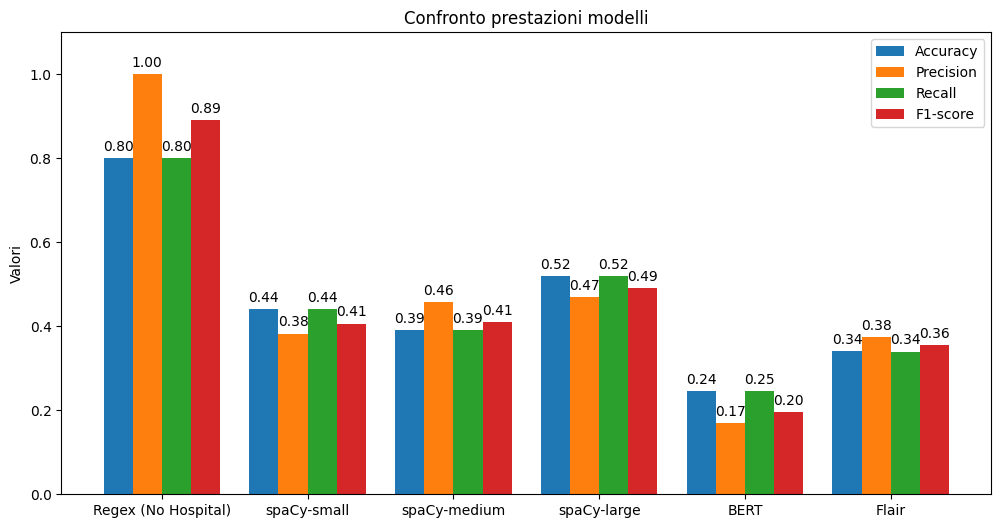

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Nomi dei modelli (inserisco Regex come primo)
models = ["Regex (No Hospital)", "spaCy-small", "spaCy-medium", "spaCy-large", "BERT", "Flair"]

# Valori delle metriche (aggiungo i valori della regex come primo elemento)
accuracy = [0.80, 0.44, 0.392, 0.519, 0.245, 0.34]
precision = [1.00, 0.3827, 0.4580, 0.4691, 0.1691, 0.3753]
recall = [0.80, 0.4404, 0.3915, 0.5186, 0.2454, 0.3397]
f1 = [0.89, 0.4064, 0.4107, 0.4903, 0.1956, 0.3551]

# Impostazioni grafico
x = np.arange(len(models))  # posizioni gruppi
width = 0.2  # larghezza barre

fig, ax = plt.subplots(figsize=(12,6))

# Creazione delle barre
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1, width, label='F1-score')

# Etichette e titolo
ax.set_ylabel('Valori')
ax.set_title('Confronto prestazioni modelli')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Mostra valori sulle barre
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')

for rects in [rects1, rects2, rects3, rects4]:
    autolabel(rects)

plt.ylim(0,1.1)  # alzo un po’ il limite per vedere bene precision=1.0
plt.show()


Sebbene la regex ottenga i risultati migliori su tutte le metriche, questi non tengono conto del fatto che con questa tecnica non viene anonimizzata la feature Hospital, che contiene troppi valori univoci per poter strutturare un'espressione regolare adeguata per l'anonimizzazione.

Tenendo conto di questo aspetto, dal grafico emerge subito che **spaCy-large supera tutti gli altri modelli** su tutte le metriche, confermandone l’efficacia nel contesto clinico. Flair e i modelli spaCy più piccoli hanno performance intermedie, mentre BERT fine-tuned su CoNLL-2003 ottiene i valori più bassi, coerente con il suo training su testi non clinici.

Il bar chart permette quindi di confrontare rapidamente le prestazioni e giustifica la scelta di spaCy-large per l’estrazione delle entità sensibili nel nostro workflow di anonimizzazione.

Quindi, per concludere, nel nostro workflow di anonimizzazione abbiamo deciso di utilizzare **spaCy en\_core\_web\_lg**, ritenuto il modello migliore tra quelli testati, per l’estrazione automatica delle entità sensibili, concentrandoci su **PERSON, ORG e DATE**.

Successivamente, applichiamo alcune **regex mirate in post-processing** per gestire casi specifici:

* Sostituzione dei nomi dei medici con `[DOCTOR]` e dei pazienti con `[PATIENT]` quando il contesto lo indica (es. presenza di “Dr.” o “Doctor”).
* Anonimizzazione di compagnie assicurative note come `[INSURANCE]`.

Queste regex **non modificano le predizioni del modello**, ma agiscono solo sul testo anonimizzato risultante.

In aggiunta, abbiamo applicato una **generalizzazione dell’età in fasce** e del **billing amount** in categorie predefinite, così da ridurre ulteriormente la possibilità di identificazione.

Infine, abbiamo eseguito la NER su un sottoinsieme del dataset per generare le **note cliniche anonimizzate**, ottenendo un equilibrio tra accuratezza del riconoscimento delle entità e protezione della privacy dei dati sensibili.



In [ ]:
import re
import spacy

# Carica spaCy
nlp = spacy.load("en_core_web_lg")
insurances = ["Aetna", "Blue Cross", "Cigna", "UnitedHealthcare", "Medicare"]

def anonymize_and_generalize(text):
    """Anonimizza con spaCy e generalizza età e billing amount."""
    doc = nlp(text)
    anonymized = text

    # Prima anonimizzazione spaCy
    for ent in reversed(doc.ents):
        context = text[max(0, ent.start_char-10): ent.end_char+10]
        if ent.label_ == "PERSON":
            if re.search(r'\bdr\.?\b', context, re.IGNORECASE) or re.search(r'\bdoctor\b', context, re.IGNORECASE):
                replacement = "[DOCTOR]"
            else:
                replacement = "[PATIENT]"
            anonymized = anonymized[:ent.start_char] + replacement + anonymized[ent.end_char:]
        elif ent.label_ == "ORG":
            if any(ins.lower() in ent.text.lower() for ins in insurances):
                replacement = "[INSURANCE]"
            else:
                replacement = "[ORG]"
            anonymized = anonymized[:ent.start_char] + replacement + anonymized[ent.end_char:]
        elif ent.label_ == "DATE":
            if "years old" in context.lower():
                continue
            anonymized = anonymized[:ent.start_char] + "[DATE]" + anonymized[ent.end_char:]
        # MONEY lasciato invariato

    # Generalizzazione età (solo fascia, senza età reale)
    def _age_repl(m):
        return get_age_group(m.group(1))

    anonymized = re.sub(
        r'\b(\d{1,3})\s*(years? old|yrs?|y/o|anni)\b',
        _age_repl,
        anonymized,
        flags=re.IGNORECASE
    )

    # Generalizzazione billing amount
    def repl_amount(m):
        return f"${generalize_billing_amount(m.group(1))}"
    anonymized = re.sub(r'\$([0-9]+(?:\.[0-9]+)?)', repl_amount, anonymized)

    return anonymized

# Test sulle prime 500 righe
df_sample = df_nlp.head(500).copy()
df_sample["nota_anonimizzata_spacy"] = df_sample["clinical_note"].apply(anonymize_and_generalize)

# Controllo
for i, row in df_sample.head(5).iterrows():
    print(f"--- RIGA {i+1} ---")
    print("Originale:", row["clinical_note"])
    print("Anon + Generalizzata:", row["nota_anonimizzata_spacy"])
    print()


--- RIGA 1 ---
Originale: On 2024-01-31, Bobby Jackson (Male, 30 years old, blood type B-) was admitted to Sons and Miller for treatment of Cancer (Urgent admission). Covered by Blue Cross, the patient was treated by Dr. Matthew Smith who prescribed Paracetamol. Tests revealed Normal. Discharge occurred on 2024-02-02 with a billing charge of $18856.28.
Anon + Generalizzata: On [DATE], [PATIENT] (Male, adult, blood type B-) was admitted to [ORG] and [PATIENT] for treatment of [ORG] admission). Covered by [INSURANCE], the patient was treated by Dr. [DOCTOR] who prescribed Paracetamol. Tests revealed Normal. Discharge occurred on [DATE] with a billing charge of $10.001-20.000.

--- RIGA 2 ---
Originale: On 2019-08-20, Leslie Terry (Male, 62 years old, blood type A+) was admitted to Kim Inc for treatment of Obesity (Emergency admission). Covered by Medicare, the patient was treated by Dr. Samantha Davies who prescribed Ibuprofen. Tests revealed Inconclusive. Discharge occurred on 2019-08-2

### Risposta alla RQ2: Quanto è efficace il Named Entity Recognition (NER) nell’anonimizzare automaticamente le note cliniche generate?
La NER può anonimizzare alcune entità chiave come date, nomi di pazienti e medici, e assicurazioni, ma le prestazioni dipendono molto dal modello utilizzato. I modelli generici faticano a riconoscere correttamente entità cliniche complesse e introducono errori o confondono categorie simili. I modelli più grandi e sofisticati catturano meglio le informazioni rilevanti, ma non sono perfetti e continuano a mancare alcune entità. In generale, la NER è più flessibile delle regex, ma per un’anonimizzazione completa e affidabile servirebbero modelli addestrati specificamente su testi clinici, eventualmente supportati da regole o dizionari dinamici.

In [ ]:
df_sample.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,clinical_note,nota_anonimizzata_regex,nota_anonimizzata_spacy
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol,Normal,"On 2024-01-31, Bobby Jackson (Male, 30 years o...","On [DATE], [PATIENT] (Male, adult, blood type ...","On [DATE], [PATIENT] (Male, adult, blood type ..."
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen,Inconclusive,"On 2019-08-20, Leslie Terry (Male, 62 years ol...","On [DATE], [PATIENT] (Male, elderly, blood typ...","On [DATE], [PATIENT] (Male, elderly, blood typ..."
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,Emergency,2022-10-07,Aspirin,Normal,"On 2022-09-22, Danny Smith (Female, 76 years o...","On [DATE], [PATIENT] (Female, elderly, blood t...","On [DATE], [PATIENT] (Female, elderly, blood t..."
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,Elective,2020-12-18,Ibuprofen,Abnormal,"Andrew Watts, (Female, 28 years old, blood typ...","[PATIENT], (Female, adult, blood type O+) was ...","[PATIENT], (Female, adult, blood type O+) was ..."
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,Urgent,2022-10-09,Penicillin,Abnormal,"On 2022-09-19, Adrienne Bell (Female, 43 years...","On [DATE], [PATIENT] (Female, middle age, bloo...","On [DATE], [PATIENT] (Female, middle age, bloo..."



### Sviluppi futuri

Per migliorare ulteriormente il nostro workflow di anonimizzazione, alcuni possibili sviluppi includono:

🔹 **Addestramento di modelli NER specifici per il dominio clinico**: utilizzare corpora medici e sanitari per aumentare la copertura di entità come farmaci, procedure, ospedali o date di ricovero.

🔹 **Espansione delle regole regex e delle categorie di entità**: includere categorie aggiuntive sensibili (es. codici diagnostici, referti di laboratorio, numeri di telefono) e regole più sofisticate basate sul contesto.

🔹 **Integrazione di approcci di anonymization avanzati**: tecniche come k-anonymity, differential privacy o embedding-based masking per proteggere meglio dati strutturati e non strutturati.

🔹 **Utilizzo di combinazione di regex e NER per migliorare le prestazioni**: sfruttare la complementarità tra regole deterministiche e modelli statistici per ridurre falsi positivi e falsi negativi.

🔹**Utilizzo di modelli generativi**: applicare LLM per riscrivere automaticamente testi clinici in forma anonima preservando la coerenza semantica.


